In [767]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [768]:
from google.colab import files

# Загружаем файл
uploaded = files.upload()

# Это загрузит файл kaggle.json
# Вы увидите виджет для загрузки файла

Saving salary_data.csv to salary_data.csv


In [979]:
import pandas as pd

dataset = pd.read_csv("salary_data.csv", encoding='utf-8')

print(dataset.keys())

Index(['country_name', 'continent_name', 'wage_span', 'median_salary',
       'average_salary', 'lowest_salary', 'highest_salary'],
      dtype='object')


In [980]:
#Описание колонок и их характеристика
dataset.dtypes

country_name       object
continent_name     object
wage_span          object
median_salary     float64
average_salary    float64
lowest_salary     float64
highest_salary    float64
dtype: object

In [981]:
# Базовые статистики
dataset.describe()

,median_salary,average_salary,lowest_salary,highest_salary
count,221.000000,221.000000,221.000000,221.000000
mean,1762.631906,1982.339812,502.783204,8802.165619
std,1634.708716,1835.429193,470.073328,8140.210641
min,0.261335,0.285524,0.072092,1.271103
25%,567.210000,651.000000,163.930000,2900.480000
50%,1227.460000,1344.230000,339.450000,5974.360000
75%,2389.010000,2740.000000,690.000000,12050.740000
max,9836.070000,11292.900000,2850.270000,50363.930000


In [982]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country_name    221 non-null    object 
 1   continent_name  221 non-null    object 
 2   wage_span       221 non-null    object 
 3   median_salary   221 non-null    float64
 4   average_salary  221 non-null    float64
 5   lowest_salary   221 non-null    float64
 6   highest_salary  221 non-null    float64
dtypes: float64(4), object(3)
memory usage: 12.2+ KB


In [983]:
#EDA анализ
print(dataset)
dataset.head()

            country_name continent_name wage_span  median_salary  \
0            Afghanistan           Asia   Monthly     853.740000   
1          Aland Islands         Europe   Monthly    3319.240000   
2                Albania         Europe   Monthly     832.840000   
3                Algeria         Africa   Monthly    1148.840000   
4         American Samoa        Oceania   Monthly    1390.000000   
..                   ...            ...       ...            ...   
216  Virgin Islands (US)  North America   Monthly    2380.000000   
217       Western Sahara         Africa   Monthly     908.560000   
218                Yemen           Asia   Monthly     120.980000   
219               Zambia         Africa   Monthly       0.261335   
220             Zimbabwe         Africa   Monthly     555.402040   

     average_salary  lowest_salary  highest_salary  
0       1001.150000     252.530000     4460.970000  
1       3858.350000     972.520000    17124.740000  
2        956.920000     

,country_name,continent_name,wage_span,median_salary,average_salary,lowest_salary,highest_salary
0,Afghanistan,Asia,Monthly,853.74,1001.15,252.53,4460.97
1,Aland Islands,Europe,Monthly,3319.24,3858.35,972.52,17124.74
2,Albania,Europe,Monthly,832.84,956.92,241.22,4258.49
3,Algeria,Africa,Monthly,1148.84,1308.81,330.11,5824.18
4,American Samoa,Oceania,Monthly,1390.00,1570.00,400.00,6980.00


In [984]:
# Размер таблицы
dataset.shape

(221, 7)

In [985]:
# Проверка на пропущенные значения
dataset.isnull().sum()

country_name      0
continent_name    0
wage_span         0
median_salary     0
average_salary    0
lowest_salary     0
highest_salary    0
dtype: int64

In [986]:
print(dataset['country_name'].unique())

['Afghanistan' 'Aland Islands' 'Albania' 'Algeria' 'American Samoa'
 'Andorra' 'Angola' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil'
 'British Indian Ocean Territory' 'Brunei' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde' 'Cayman Islands'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia' 'Comoros'
 'Congo' 'Congo Democratic Republic' 'Cook Islands' 'Costa Rica'
 'Cote Divoire' 'Croatia' 'Cuba' 'Cyprus' 'Czech Republic' 'Denmark'
 'Djibouti' 'Dominica' 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Ethiopia'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Guiana'
 'French Polynesia' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Gibraltar' 'Greece' 'Greenland' 'Grenada' 'Guadeloupe

In [987]:
print(dataset['country_name'])

0              Afghanistan
1            Aland Islands
2                  Albania
3                  Algeria
4           American Samoa
              ...         
216    Virgin Islands (US)
217         Western Sahara
218                  Yemen
219                 Zambia
220               Zimbabwe
Name: country_name, Length: 221, dtype: object


In [988]:
print(dataset['continent_name'].unique())

['Asia' 'Europe' 'Africa' 'Oceania' 'Caribbean' 'South America'
 'North America' 'Central America' 'Northern America']


In [989]:
#Переименование колонок
dataset = dataset.rename(columns={"country_name": "Country", "continent_name": "Continent", "wage_span": "Type", "median_salary": "Salary (Median)","average_salary": "Salary (Average)",
                            "lowest_salary": "Salary (Low)", "highest_salary": "Salary (High)" })
dataset.head(10)

,Country,Continent,Type,Salary (Median),Salary (Average),Salary (Low),Salary (High)
0,Afghanistan,Asia,Monthly,853.74,1001.15,252.53,4460.97
1,Aland Islands,Europe,Monthly,3319.24,3858.35,972.52,17124.74
2,Albania,Europe,Monthly,832.84,956.92,241.22,4258.49
3,Algeria,Africa,Monthly,1148.84,1308.81,330.11,5824.18
4,American Samoa,Oceania,Monthly,1390.00,1570.00,400.00,6980.00
5,Andorra,Europe,Monthly,3668.08,4069.77,1120.51,17653.28
6,Angola,Africa,Monthly,284.39,314.39,79.32,1403.96
7,Antigua and Barbuda,Caribbean,Monthly,1548.15,1677.78,422.22,7444.44
8,Argentina,South America,Monthly,110.28,129.42,32.57,577.13
9,Armenia,Asia,Monthly,1700.25,1974.32,497.39,8780.39


In [990]:
import plotly.express as px

In [991]:
fig1 = px.bar(dataset, x = "Country", y = "Salary (High)", color='Country',
             width=1100, height=800, title="Highest Salary vs Country", )
fig1.show()

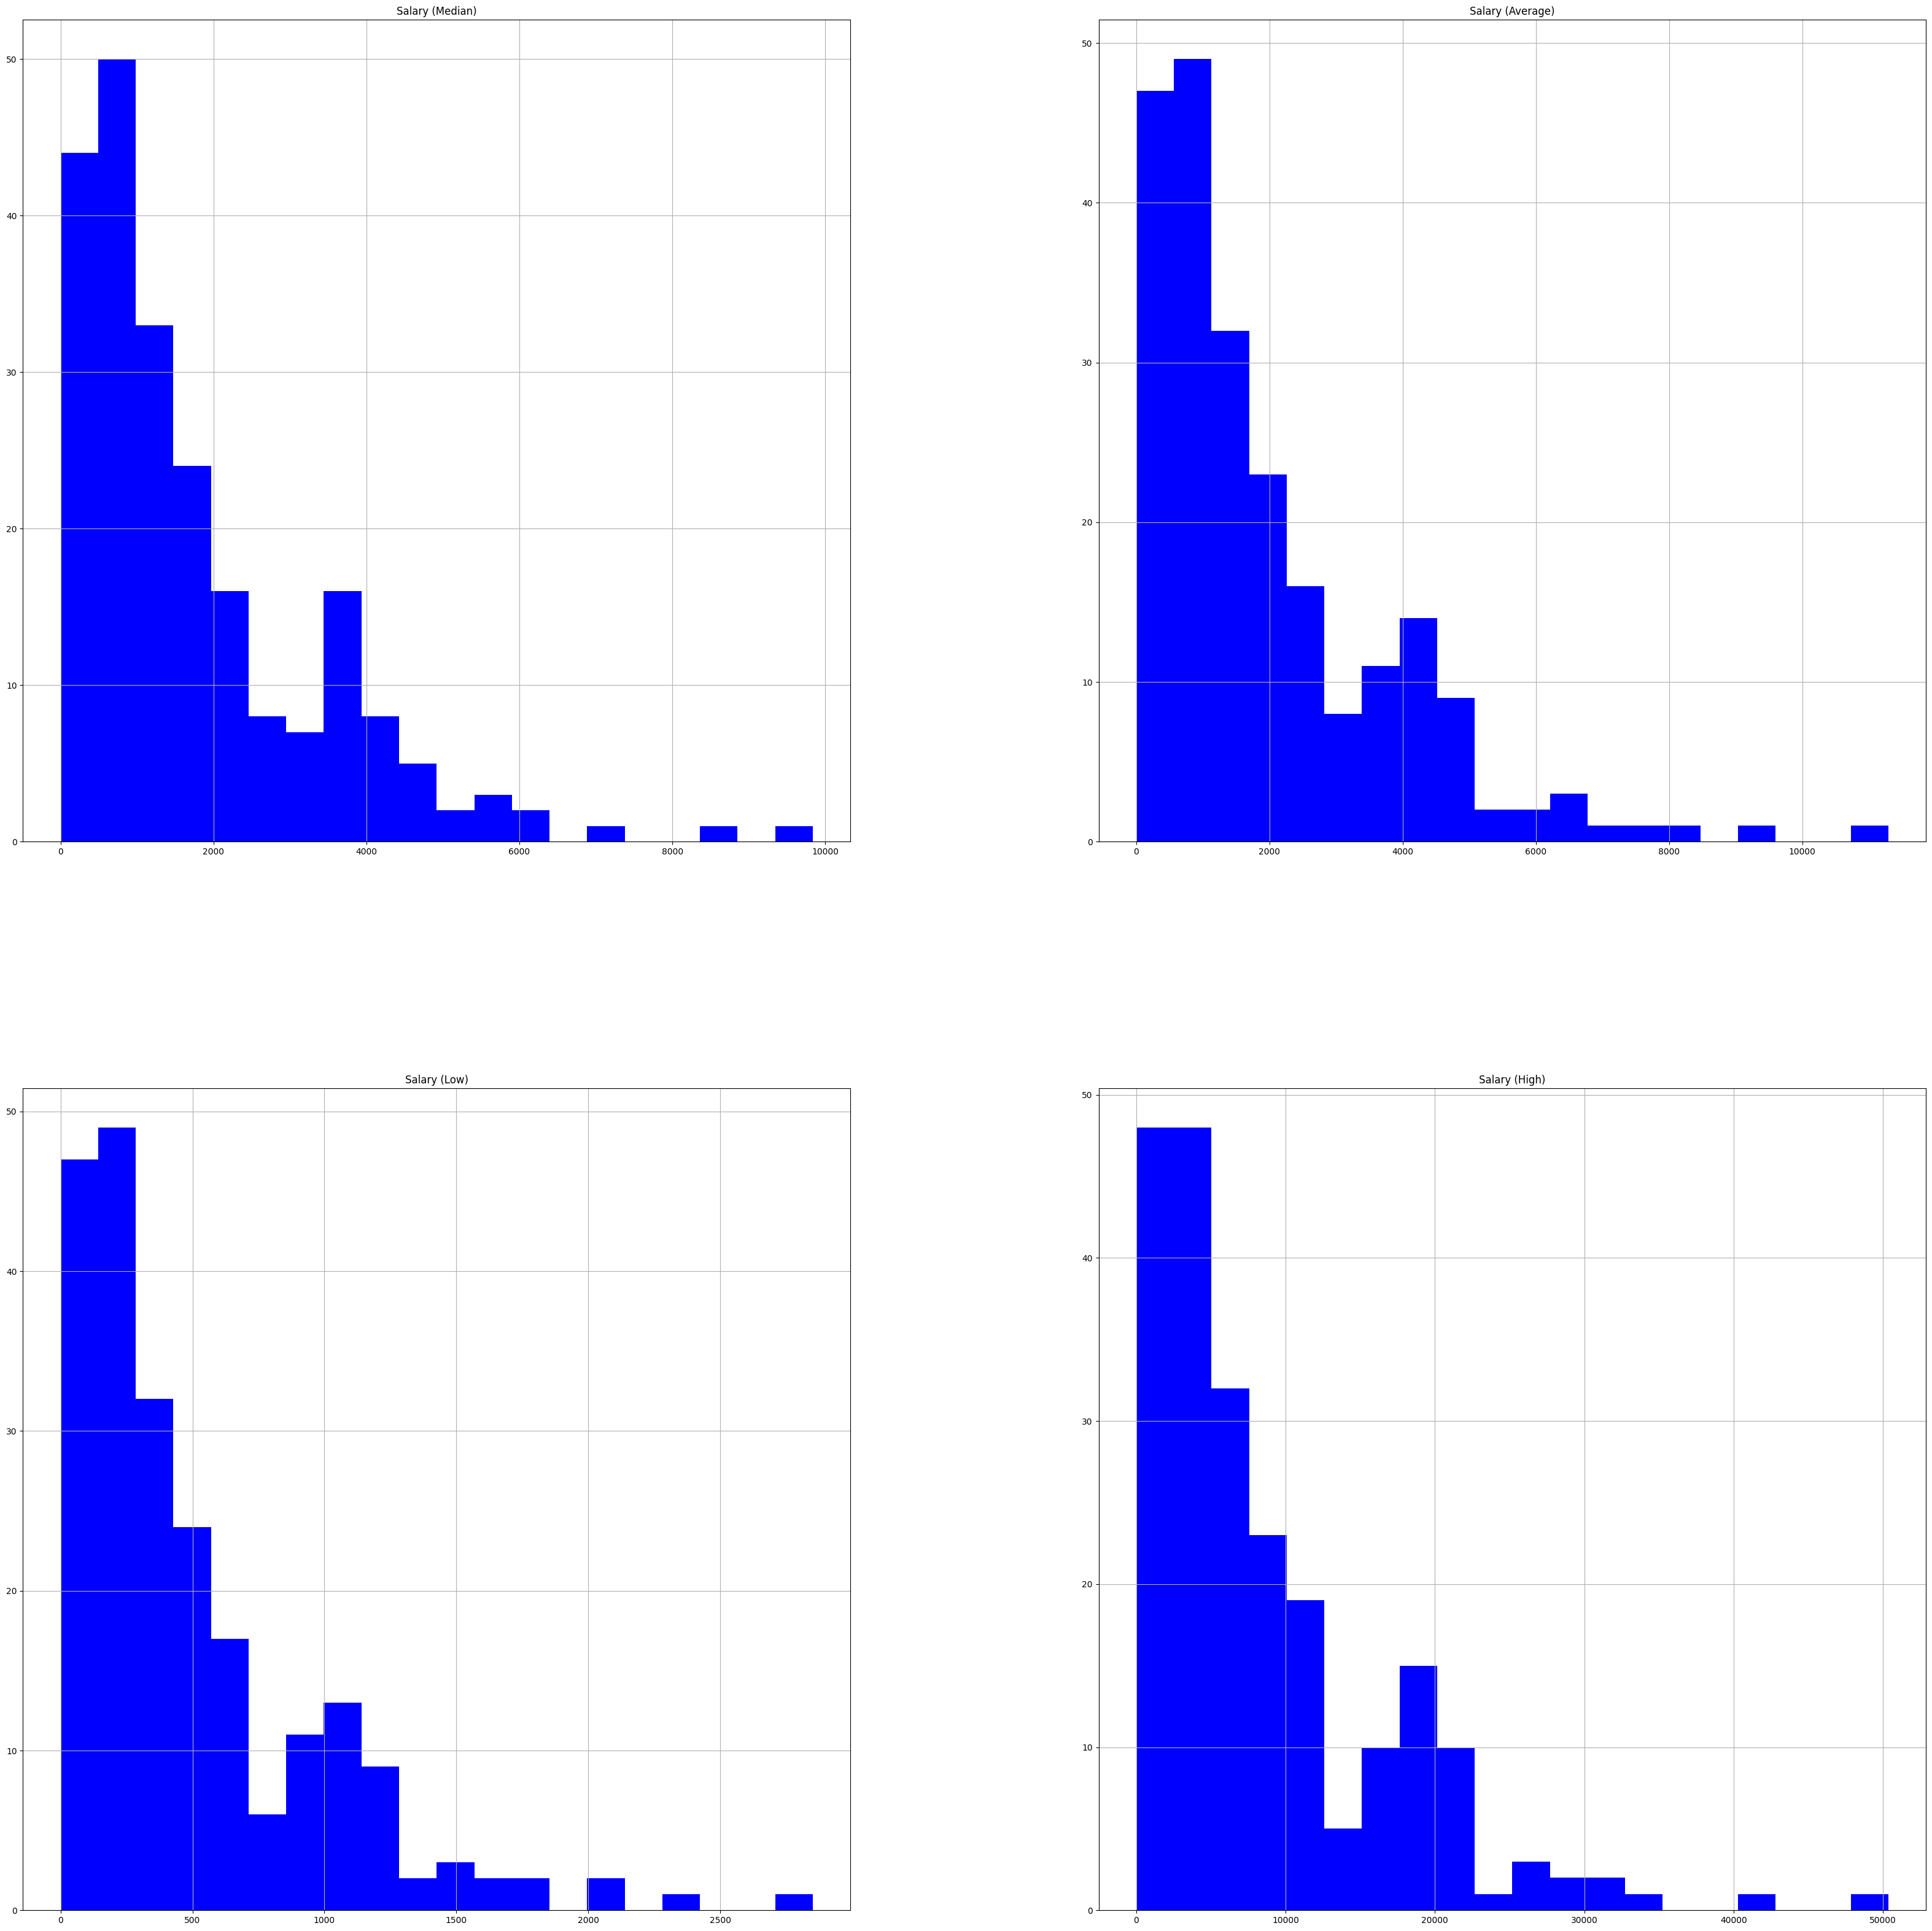

In [992]:
# Визуализация распределения данных
dataset.hist(bins=20, figsize=(40,40), color='b')
plt.show()

In [993]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [994]:
# Категориальные значения
label_encoder = LabelEncoder()
dataset['Country'] = label_encoder.fit_transform(dataset['Country'])
dataset['Continent'] = label_encoder.fit_transform(dataset['Continent'])
dataset['Type'] = label_encoder.fit_transform(dataset['Type'])

In [995]:
X = dataset.drop(['Salary (Average)'], axis=1)
Y = dataset['Salary (Average)']

In [996]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [997]:
# Преобразование нужных столбцов в числовые типы данных
numeric_columns = ['Type']
dataset[numeric_columns] = dataset[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [998]:
# Extra Trees
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [999]:
X = dataset.drop(['Salary (Average)'], axis=1)
Y = dataset['Salary (Average)']

In [1000]:
#Разделение на обучающий и тестовую выборку
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [1001]:
# Создание и обучение модели Extra Trees для регрессии
model = ExtraTreesRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

ExtraTreesRegressor(random_state=42)

In [1002]:
Y_pred = model.predict(X_test)

In [1003]:
mae_extra = mean_absolute_error(Y_test, Y_pred)
mse_extra = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [1004]:
print(f'Mean Absolute Error: {mae_extra:.2f}')
print(f'Mean Squared Error: {mse_extra:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Absolute Error: 27.17
Mean Squared Error: 4044.22
R-squared: 1.00


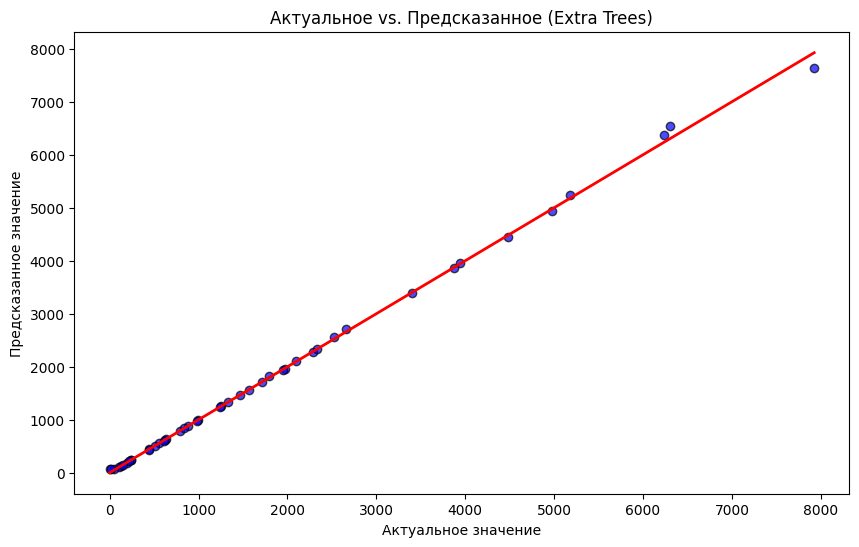

In [1005]:
# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)
plt.xlabel('Актуальное значение')
plt.ylabel('Предсказанное значение')
plt.title('Актуальное vs. Предсказанное (Extra Trees)')
plt.show()

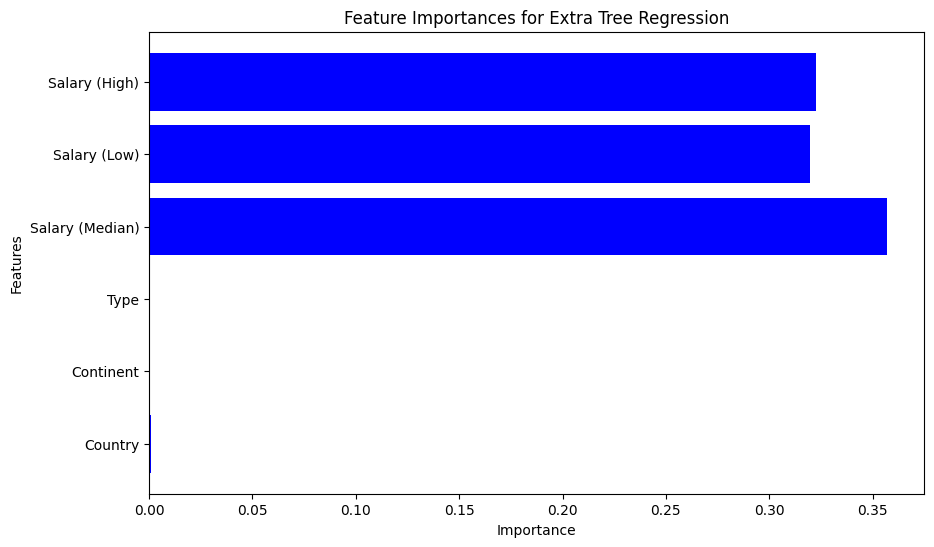

In [1006]:
# Визуализируем важность признаков
plt.figure(figsize=(10, 6))
plt.barh(X.columns, np.abs(model.feature_importances_), color='blue')
plt.title('Feature Importances for Extra Tree Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [1007]:
#AdaBoostRegressor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [1008]:
X = dataset.drop(['Salary (Average)'], axis=1)
Y = dataset['Salary (Average)']

In [1009]:
#Разделение на обучающий и тестовую выборку
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [1010]:
# Создание и обучение модели AdaBoostRegressor
model = AdaBoostRegressor(n_estimators=100, random_state=42)
model.fit(X_train, Y_train)

AdaBoostRegressor(n_estimators=100, random_state=42)

In [1011]:
# Выполнение предсказаний на тестовых данных
Y_pred = regressor.predict(X_test)

In [1012]:
# Вычисление метрик
mse_ada = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

In [1013]:
print(f"Mean Squared Error (MSE): {mse_ada:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

Mean Squared Error (MSE): 11.33
R-squared (R^2): 1.00


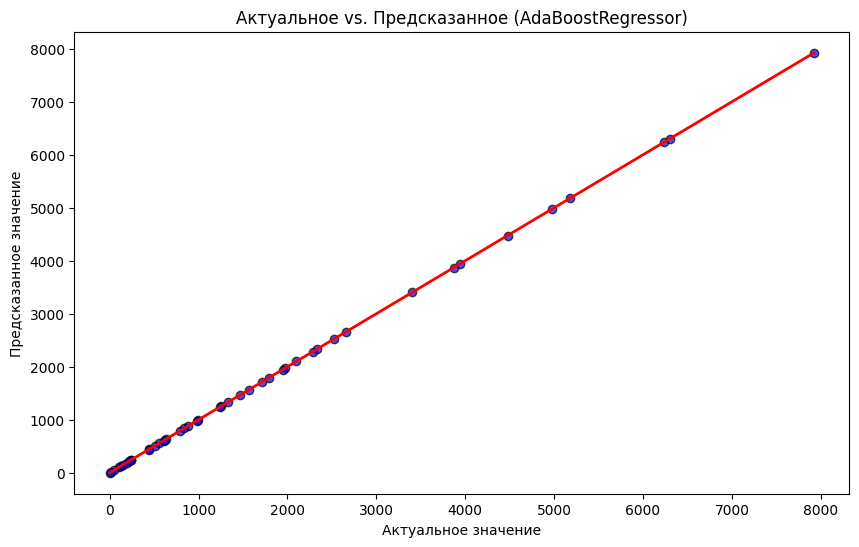

In [1014]:
# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)
plt.xlabel('Актуальное значение')
plt.ylabel('Предсказанное значение')
plt.title('Актуальное vs. Предсказанное (AdaBoostRegressor)')
plt.show()

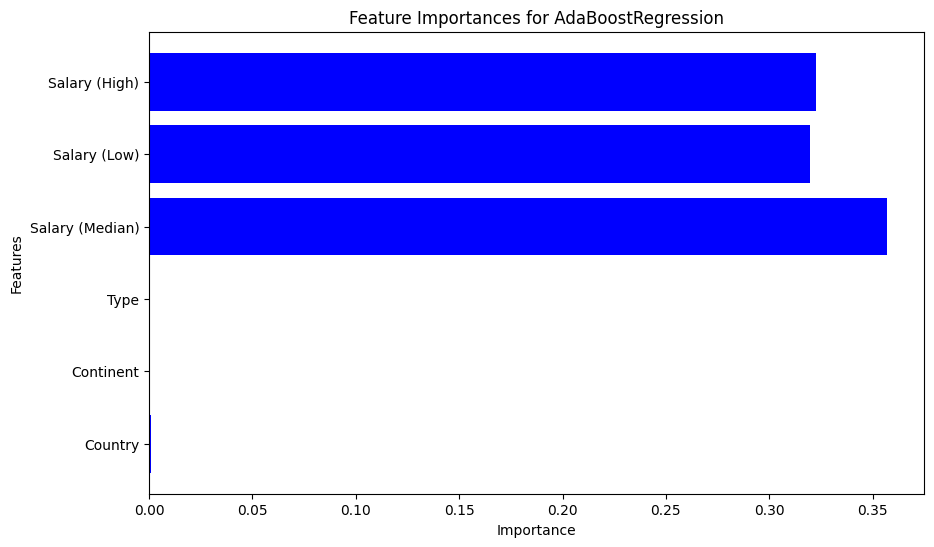

In [1015]:
# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(X.columns, np.abs(regressor_salary_data.feature_importances_), color='blue')
plt.title('Feature Importances for AdaBoostRegression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [1016]:
# Лассо
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [1017]:
X = dataset.drop(['Salary (Average)'], axis=1)
Y = dataset['Salary (Average)']

In [1018]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [1019]:
# Создание и обучение модели регрессии Lasso
model = Lasso(alpha=0.1)  # Здесь alpha - гиперпараметр регуляризации
model.fit(X_train, Y_train)

Lasso(alpha=0.1)

In [1020]:
# Выполнение предсказаний на тестовых данных
Y_pred = regressor.predict(X_test)

In [1021]:
# Вычисление метрик
mse_lasso = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print(f"Mean Squared Error (MSE_lasso): {mse_lasso:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

Mean Squared Error (MSE_lasso): 11.33
R-squared (R^2): 1.00


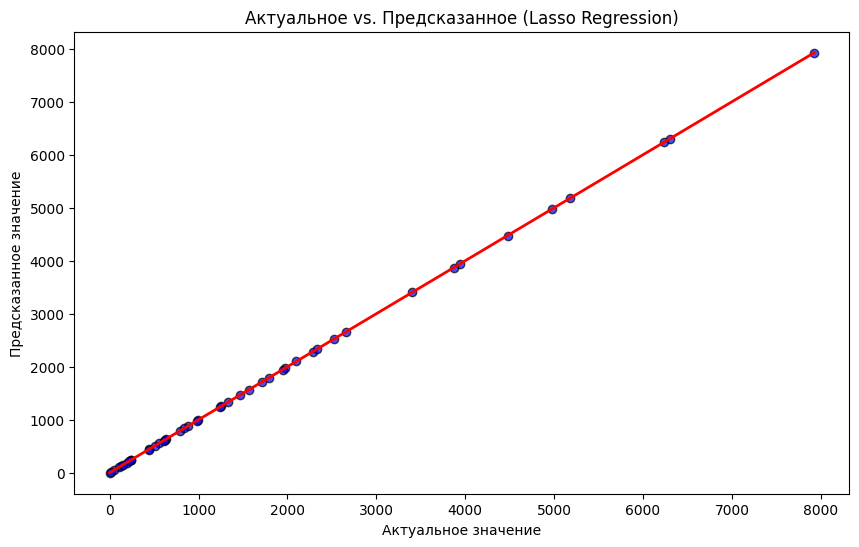

In [1022]:
# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, Y_pred, color='blue', edgecolor='k', alpha=0.7)
plt.plot([min(Y_test), max(Y_test)], [min(Y_test), max(Y_test)], color='red', linewidth=2)
plt.xlabel('Актуальное значение')
plt.ylabel('Предсказанное значение')
plt.title('Актуальное vs. Предсказанное (Lasso Regression)')
plt.show()

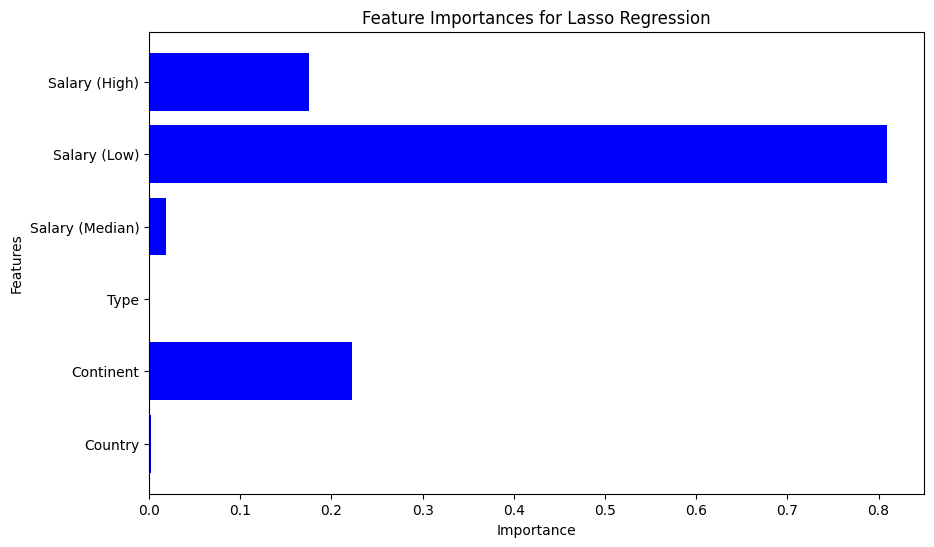

In [1023]:
# Визуализация важности признаков для модели линейной регрессии Лассо
plt.figure(figsize=(10, 6))
plt.barh(X.columns, np.abs(regressor.coef_), color='blue')
plt.title('Feature Importances for Lasso Regression')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

In [1024]:
# Ridge гребневая регрессия
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [1025]:
X = dataset.drop(['Salary (Average)'], axis=1)
Y = dataset['Salary (Average)']

In [1026]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [1027]:
# Создание и обучение модели гребневой регрессии
model = Ridge(alpha=1.0)  # Здесь alpha - гиперпараметр регуляризации
model.fit(X_train, Y_train)

Ridge()

In [1028]:
# Выполнение предсказаний на тестовых данных
Y_pred = regressor.predict(X_test)

In [1029]:
# Вычисление метрик
mse_ridge = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse_ridge:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

Mean Squared Error (MSE): 11.33
R-squared (R^2): 1.00


In [1030]:
# Регрессор Gradient Boosting.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [1031]:
X = dataset.drop(['Salary (Average)'], axis=1)
Y = dataset['Salary (Average)']

In [1032]:
# Разделение данных на обучающий и тестовый наборы
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [1033]:
# Создание и обучение модели Gradient Boosting Regressor
model = GradientBoostingRegressor() # параметры
model.fit(X_train, Y_train)

GradientBoostingRegressor()

In [1034]:
# Предсказание на тестовой выборке
Y_pred = model.predict(X_test)

# Вычисление метрик
mae_gra = mean_absolute_error(Y_test, Y_pred)
mse_gra = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f'*****************')
print(f'Метрики качества:')
print(f'*****************')
print(f'MAE: {mae_gra}')
print(f'MSE: {mse_gra}')
print(f'R²: {r2}')

*****************
Метрики качества:
*****************
MAE: 57.158811439449956
MSE: 16784.415365824243
R²: 0.9953800621933465


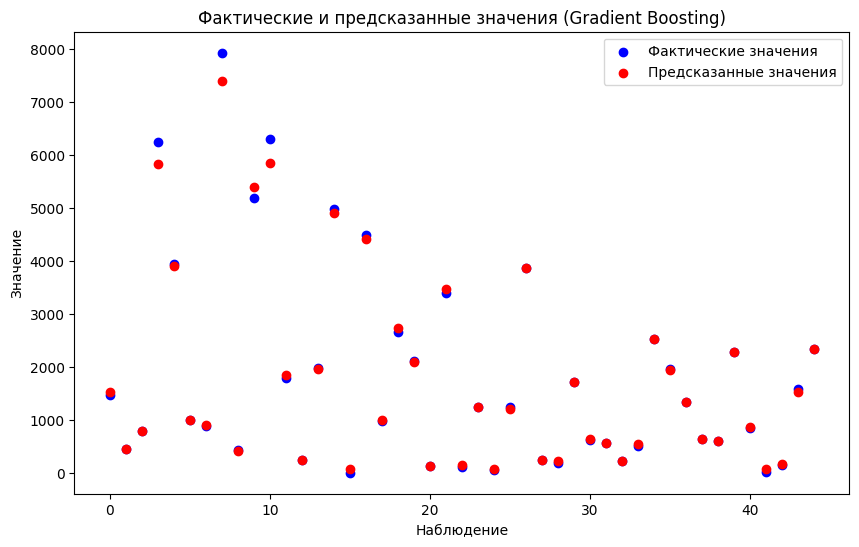

In [1035]:
# Визуализация предсказанных и фактических значений
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Фактические значения')
plt.scatter(range(len(Y_test)), Y_pred, color='red', label='Предсказанные значения')
plt.xlabel('Наблюдение')
plt.ylabel('Значение')
plt.title('Фактические и предсказанные значения (Gradient Boosting)')
plt.legend()
plt.show()

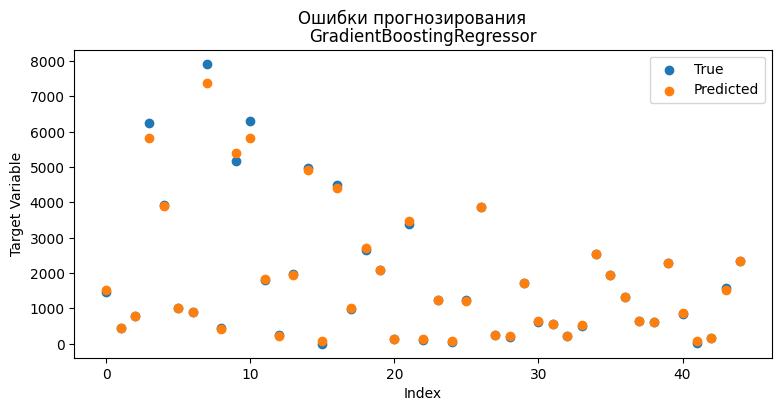

In [1038]:
# Визуализация
plt.figure(figsize=(9, 4))

Y_pred = model.predict(X_test)
plt.scatter(range(len(Y_test)), Y_test, label='True')
plt.scatter(range(len(Y_test)), Y_pred, label='Predicted')
plt.title(f"{type(model).__name__}")
plt.xlabel('Index')
plt.ylabel('Target Variable')
plt.legend()
plt.suptitle('Ошибки прогнозирования')
plt.show()

In [1039]:
# Визуализация метрик качества обученной модели
models = ['Extra Tree', 'AdaBoost', 'Lasso', 'Ridge', 'GradientBoosting']
mse = [1 - mse_extra, 1 - mse_ada, 1 - mse_lasso, 1 - mse_ridge, 1 - mse_gra]

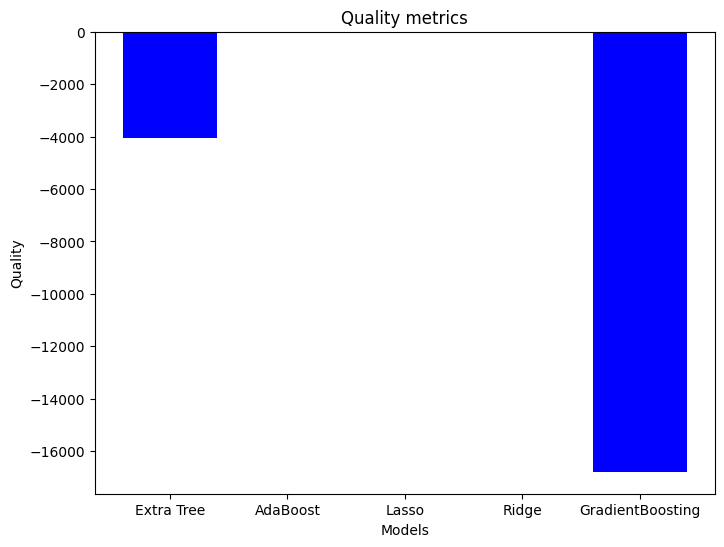

In [1040]:
plt.figure(figsize=(8, 6))
plt.bar(models, mse, color='blue')
plt.title('Quality metrics')
plt.ylabel('Quality')
plt.xlabel('Models')
plt.show()

In [1041]:
# Поиск аномалий
from sklearn.ensemble import IsolationForest
# Обучение модели
clf = IsolationForest(contamination=0.1, random_state=42)  # contamination - ожидаемая доля аномалий в данных
clf.fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



IsolationForest(contamination=0.1, random_state=42)

In [1042]:
# Предсказание аномалий
Y_pred = clf.predict(X)

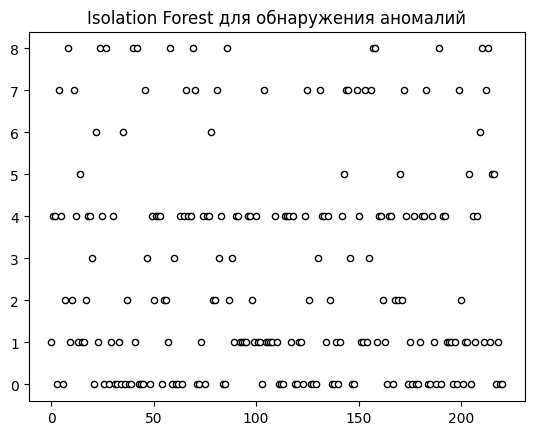

In [1043]:
# Отображение результатов
plt.title("Isolation Forest для обнаружения аномалий")
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c='white', s=20, edgecolor='k')

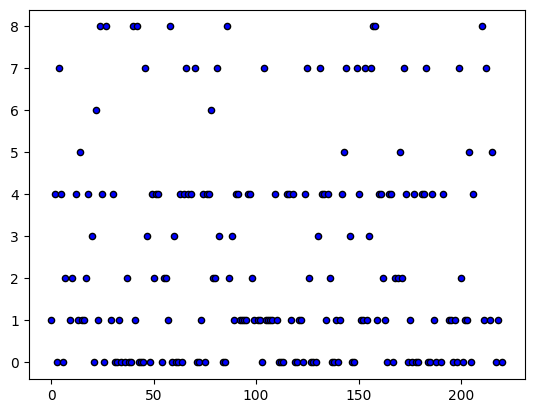

In [1044]:
# Отображение нормальных точек
normal_points = X[Y_pred == 1]
plt.scatter(normal_points.iloc[:, 0], normal_points.iloc[:, 1], c='blue', s=20, edgecolor='k', label="Нормальные точки")

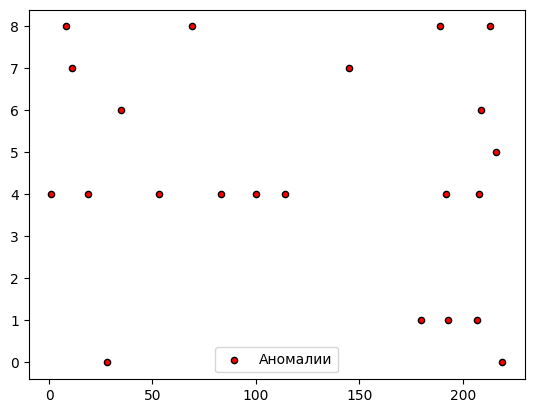

In [1045]:
# Отображение аномалий
anomalies = X[Y_pred == -1]
plt.scatter(anomalies.iloc[:, 0], anomalies.iloc[:, 1], c='red', s=20, edgecolor='k', label="Аномалии")

plt.legend()
plt.show()